In [1]:
from triglav import Triglav

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Create the dataset. The useful features are found in the first 7 columns of X (indicies 0-6)
X, y = make_classification(n_samples=200,
                          n_features=20,
                          n_informative=5,
                          n_redundant=2,
                          n_repeated=0,
                          n_classes=2,
                          shuffle=False,
                          random_state=0)

In [4]:
X

array([[-2.30258060e+00,  4.65324710e-01,  8.75262655e-01, ...,
         7.30351790e-01,  1.10457847e+00, -1.01482591e+00],
       [-3.06016129e+00, -1.92995248e+00, -7.03383886e-01, ...,
         5.31178367e-01, -1.28241974e-01, -2.71771566e-01],
       [-2.93680374e+00, -6.32727440e-01, -1.82024967e+00, ...,
        -1.69758294e-01, -1.34132783e-01,  1.22138496e+00],
       ...,
       [-1.43990301e+00, -1.32421905e+00, -1.10928406e+00, ...,
         1.52000352e+00,  5.22083253e-01, -5.07059956e-01],
       [-1.77163483e-01, -9.03049801e-04, -1.03082710e+00, ...,
         8.62707434e-01, -6.47538026e-01,  6.43904074e-01],
       [-3.50578758e+00, -6.24115164e-01, -1.43742258e+00, ...,
         5.95611953e-01, -1.37530195e+00,  6.23010196e-01]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0,
                                                   stratify=y)

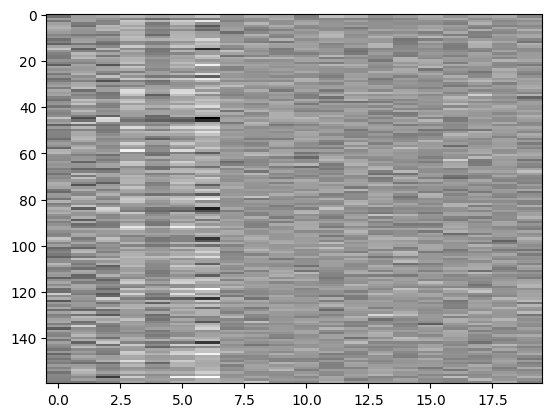

In [7]:
plt.imshow(X_train, cmap='gray', aspect='auto', interpolation='nearest')

In [8]:
# Standardize
s_trf = StandardScaler().fit(X_train)
X_train_std = s_trf.transform(X_train)
X_test_std = s_trf.transform(X_test)

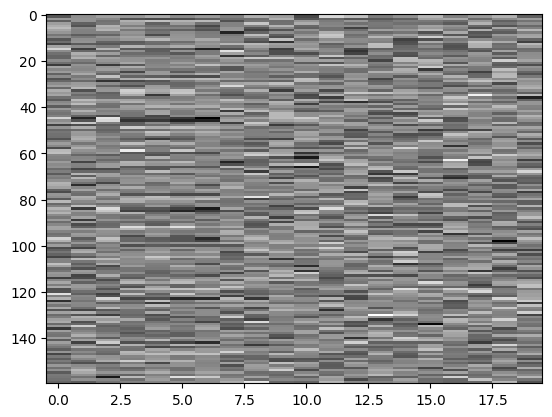

In [9]:
plt.imshow(X_train_std, cmap='gray', aspect='auto', interpolation='nearest')

In [10]:
# Set up Triglav
model = Triglav(estimator=HistGradientBoostingClassifier(min_samples_leaf=15),
               per_class_imp=True,
               n_jobs=16,
               metric="euclidean",
               linkage="ward",
               criterion="maxclust",
               transformer=StandardScaler(),
                verbose=1)

In [11]:
model

Triglav(criterion='maxclust',
        estimator=HistGradientBoostingClassifier(min_samples_leaf=15),
        linkage='ward', metric='euclidean', n_jobs=16, per_class_imp=True,
        transformer=StandardScaler(), verbose=1)

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


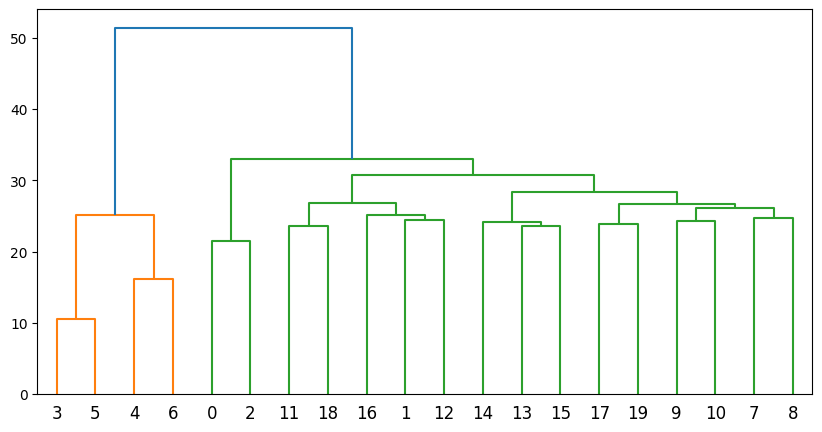

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
dend = model.visualize_hclust(X_train, y_train, ax=ax)
# optionally save dendrogram to file
# plt.savefig('dendrogram.svg')

In [13]:
# Reset the threshold based on inspection of the dendrogram
model.thresh = 9

In [14]:
# Identify predictive features
model.fit(X_train, y_train)

Stage One: Identifying an initial set of tentative features...


scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


Round 1 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 2 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 3 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 4 / Tentative (Accepted): 0 / Tentative (Not Accepted): 0 / Rejected: 0
Round 5 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 6 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 7 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 8 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 9 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 10 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 11 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 12 / Tentative (Accepted): 0 / Tentative (Not Accepted): 9 / Rejected: 0
Round 13 / Tentative (Accepted): 0 / Tentative (Not Accepted)

  0%|          | 0/1 [00:00<?, ?it/s]

Final Feature Set Contains 8 Features.
Final Set of Best Features Contains 3 Features.


Triglav(criterion='maxclust',
        estimator=HistGradientBoostingClassifier(min_samples_leaf=15),
        linkage='ward', metric='euclidean', n_jobs=16, per_class_imp=True,
        thresh=9, transformer=StandardScaler(), verbose=1)

In [15]:
# Transform the test data
X_test_trf = model.transform(X_test)

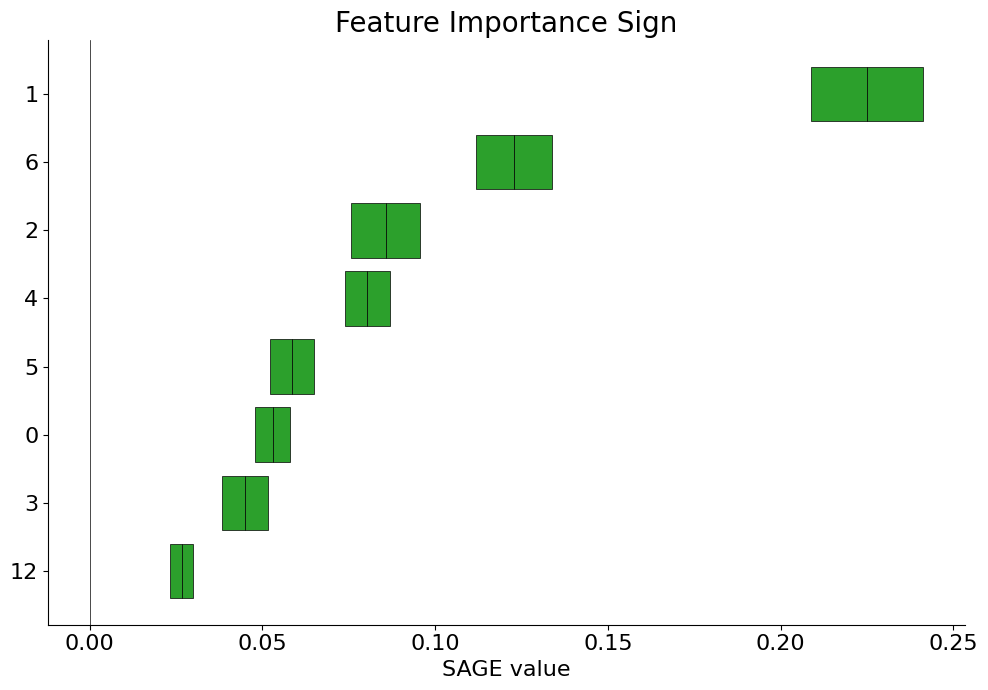

In [16]:
# Visualize feature importance results using SAGE (Figure 2 below)
model.sage_values_.plot_sign(feature_names=np.asarray([i for i in range(20)])[model.selected_])

In [17]:
# Check cross-validation performance (Entire Dataset) (Original Data - Mean Score = 0.895 / Transformed Data - Mean Score = 0.915)
clf = make_pipeline(StandardScaler(), ExtraTreesClassifier(128, random_state=0))

In [18]:
scores = cross_val_score(clf, X, y, cv=10)

In [19]:
scores.mean()

0.8949999999999999

In [20]:
scores = cross_val_score(clf, model.transform(X), y, cv=10)

In [21]:
scores.mean()

0.9149999999999998